# Esame Finale del Modulo 4 Python
## Analisi del dataset completo Covid-19 fornito da Our World in Data

### Consegna:  
- Si richiede di verificare le dimensioni del dataset e le diciture presenti nell'intestazione;
- Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
- Sempre riguardo i casi di COVID totali, si chiede di sviluppare una funzione che prenda in input il dataset e due nomi di continenti, e che ne confronti i seguenti relativi descrittori statistici: valori minimo e massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);
- Si chiede poi di effettuare lo stesso tipo di analisi – anche in questo caso sviluppando una funzione ad hoc – per il numero di vaccinazioni totali per ogni continente;
- Alla fine, basandosi sui calcoli fatti, il committente chiede di stilare un breve (tre o quattro righe) paragrafo testuale riassuntivo sulle statistiche di casi e vaccinazioni, che si concentri solo sulle differenze esistenti tra Europa, Sud America e Oceania.

*Importo le librerie e scarico il csv del dataset dall' url, così da evitare problemi con gli indirizzi di file eventualmente salvati nel posto sbagliato dopo la condivisione*          
*Lascio in allegato il link alla repository di GitHub, così da potervi accedere senza troppa difficoltà nel caso volessimo leggere maggiori informazioni riguardo al contenuto del dataset*
*GitHub link:* [Our World in Data - Covid19 dataset](https://github.com/owid/covid-19-data/tree/master/public/data)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from humanize import intword

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, low_memory=False)

*Step 1: Do una prima occhiata con .info(); Aggiungendo il parametro memory_usage="deep" restituisce esattamente la memoria fisica occupata dal dataset, così da rispondere meglio alla prima domanda*  
*Si può notare che è un dataset di notevoli dimensioni, soprattutto dal punto di vista delle colonne.*

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378591 entries, 0 to 378590
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    378591 non-null  object 
 1   continent                                   360491 non-null  object 
 2   location                                    378591 non-null  object 
 3   date                                        378591 non-null  object 
 4   total_cases                                 339793 non-null  float64
 5   new_cases                                   367810 non-null  float64
 6   new_cases_smoothed                          366580 non-null  float64
 7   total_deaths                                317779 non-null  float64
 8   new_deaths                                  367817 non-null  float64
 9   new_deaths_smoothed                         366587 non-null  float64
 

*Aggiungo il metodo .columns così da poter leggere effettivamente tutti i nomi di colonna*  
*In questo caso .columns va senza le parentesi () perchè è un metodo del nostro DataFrame, non una funzione generica*

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
314394,ZAF,Africa,South Africa,2023-09-19,4072533.0,0.0,0.000,102595.0,0.0,0.000,...,33.2,43.993,2.32,64.13,0.709,59893884.0,NaN,NaN,NaN,NaN
256715,PLW,Oceania,Palau,2021-03-22,NaN,0.0,0.000,NaN,0.0,0.000,...,22.7,NaN,4.80,73.70,0.826,18084.0,NaN,NaN,NaN,NaN
278105,RUS,Europe,Russia,2022-04-30,18137137.0,0.0,8917.143,374902.0,0.0,200.286,...,58.3,NaN,8.05,72.58,0.824,144713312.0,1200619.6,29.3,0.4,8296.539
6617,ASM,Oceania,American Samoa,2021-09-17,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
244189,PRK,Asia,North Korea,2021-04-26,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,13.20,72.27,NaN,26069416.0,NaN,NaN,NaN,NaN
264576,PER,South America,Peru,2022-03-23,3540108.0,0.0,774.429,211751.0,0.0,46.857,...,NaN,NaN,1.60,76.74,0.777,34049588.0,NaN,NaN,NaN,NaN
153782,IDN,Asia,Indonesia,2022-06-17,6060488.0,0.0,526.857,156643.0,0.0,4.000,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
299097,SEN,Africa,Senegal,2022-11-16,88838.0,0.0,2.714,1968.0,0.0,0.000,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
81632,CYP,Europe,Cyprus,2021-09-27,119690.0,0.0,118.000,566.0,0.0,0.714,...,52.7,NaN,3.40,80.98,0.887,896007.0,NaN,NaN,NaN,NaN
298711,SEN,Africa,Senegal,2021-10-26,73891.0,0.0,3.714,1877.0,0.0,0.857,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN


*I dati in questo dataset sono veramente tanti, viste le richieste della consegna dell'esame direi che possiamo importare solo quelle strettamente necessarie, così da ottimizzare il workload e ciò che ne consegue*

In [6]:
df.loc[:, [
            "iso_code",
            "continent",
            "location",
            "date",
            "total_cases",
            "total_vaccinations"
            ]]

,iso_code,continent,location,date,total_cases,total_vaccinations
0,AFG,Asia,Afghanistan,2020-01-05,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,NaN
...,...,...,...,...,...,...
378586,ZWE,Africa,Zimbabwe,2024-02-07,266319.0,NaN
378587,ZWE,Africa,Zimbabwe,2024-02-08,266319.0,NaN
378588,ZWE,Africa,Zimbabwe,2024-02-09,266319.0,NaN
378589,ZWE,Africa,Zimbabwe,2024-02-10,266319.0,NaN


*Salvo il nuovo DataFrame in una nuova variabile, così da non modificare l'originale*

In [7]:
df_2 = df.loc[:, [
            "iso_code",
            "continent",
            "location",
            "date",
            "total_cases",
            "total_vaccinations"
            ]]

*Siamo così passati da quasi 300MB a 90MB*

In [8]:
df_2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378591 entries, 0 to 378590
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   iso_code            378591 non-null  object 
 1   continent           360491 non-null  object 
 2   location            378591 non-null  object 
 3   date                378591 non-null  object 
 4   total_cases         339793 non-null  float64
 5   total_vaccinations  82705 non-null   float64
dtypes: float64(2), object(4)
memory usage: 86.9 MB


*Step 2: Cerchiamo i casi totali per continente*  
*Essendo i dati della colonna "total_cases" aggiornati e ripetuti per ogni nuova data, devo prima aggregare per "location" recuperando solo il valore massimo di "total_values" di ogni nazione con la funzione .idxmax(), i quali poi vengono sommati nella seconda groupby su "continent" per avere i casi totali di ogni continente.*

*Ho notato che nella colonna "location" alcuni dati non hanno il nome della nazione ma sono indicizzati come "World" o con il nome del proprio continente. Viene dunque creata una aggregazione anche per quei dati, ma che verranno poi ignorati nella seconda groupby per continente avendo valore null in tale colonna.*  
*La groupby accetta il parametro dropna=bool che di default è True, in questo caso ho voluto specificarlo comunque.*

*Per concludere, ho voluto aggiungere, avendo visto a lezione teorica la libreria "Humanize", una miglior comprensione delle somme. Per fare questo, ho utilizzato la funziona .apply() dove al suo interno chiamo una funzione lambda che ritorna ogni somma in versione "umanizzata".*

In [9]:
df_max_cases = df_2.groupby(by="location")["total_cases"].idxmax()
df_2.loc[df_max_cases].groupby(by="continent", dropna=True)["total_cases"].sum().apply(lambda tot: intword(tot))

continent
Africa            13.1 million
Asia             301.4 million
Europe           252.2 million
North America    124.5 million
Oceania           14.8 million
South America     68.7 million
Name: total_cases, dtype: object

*Step 3: Analisi di due continenti rispetto al totale mondiale*

*Come prima cosa creo il loop per accettare un input corretto dall'utente, uso poi la funzione .title() per formattare il testo con la prima lettera di ogni parola maiuscola e tutte le restanti minuscole*


In [10]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
def get_inputs(continents=continents):
    first_continent = ""
    second_continent = ""
    while True:
        if first_continent == "":
            first_continent = input("Inserisci il primo continente (Africa, Asia, Europe, North America, Oceania, South America): ").title()
            if first_continent not in continents:
                print("Il nome non è corretto, riprova")
                first_continent = ""
                continue
        else:
            second_continent = input("Inserisci il secondo continente (Africa, Asia, Europe, North America, Oceania, South America): ").title()
            if second_continent not in continents:
                print("Il nome non è corretto, riprova")
                second_continent = ""
            else:
                return first_continent, second_continent


*Ora passo alla creazione della funzione per mettere in relazione i due continenti che lascio scegliere in input all'utente. Come dataset setto di default nella funzione il dataset già aggregato per "location" e non quello originiale, così da facilitare le analisi nella funzione.*  
*Come da traccia ho deciso di lavorare sui "total_cases", quindi il minimo non sarà mai 0, ma invece lo stato che ha avuto meno contagiati in totale di quel continente*

*NB: la richiesta dice espressamente di valutare i casi totali dei due continenti selezionati con la somma dei casi totali comprensivi delle righe con valore NaN in "continent". Analizzando bene il dataset, ci si può benissimo accorgere (come mostro nelle celle successive) che le uniche location senza indicazione di continente sono raggruppamenti creati appunto da OWID. Nella descrizione della colonna "iso_code" difatti lo specifica. Come conferma ho voluto sommare di questi valori solo quelli che riportano nella colonna **"location"** il nome di ogni continente, e poi sottraendo a questa somma il valore di "total_cases" della cella "World". C'è una leggera discrepanza di 5000 casi, ciò significa che possiamo eventualmente utilizzare direttamente quel singolo dato per paragonare i totali dei continenti.*

*Dunque farò ritornare due comparazioni con il totale mondiale diverse, una rispetto al totale come richiesto dalla traccia e uno con il valore di total_cases di World*

In [11]:
dataset_prova = df_2.loc[df_max_cases]
dataset_prova.loc[dataset_prova["continent"].isna(), ["iso_code", "location", "total_cases"]]


,iso_code,location,total_cases
2997,OWID_AFR,Africa,13138027.0
19490,OWID_ASI,Asia,301338903.0
106364,OWID_EUR,Europe,252207645.0
107877,OWID_EUN,European Union,185561975.0
145379,OWID_HIC,High income,428218396.0
191884,OWID_LIC,Low income,2326253.0
193383,OWID_LMC,Lower middle income,97514347.0
243701,OWID_NAM,North America,124517160.0
253269,OWID_OCE,Oceania,14754528.0
316038,OWID_SAM,South America,68668910.0


In [12]:
prova = dataset_prova[
    (dataset_prova.location == "Africa") |
    (dataset_prova.location == "Asia") |
    (dataset_prova.location == "Europe") |
    (dataset_prova.location == "North America") |
    (dataset_prova.location == "Oceania") |
    (dataset_prova.location == "South America")
]["total_cases"].sum()
prova - 774493392.0

131781.0

In [13]:
df_function = df_2.loc[df_max_cases]
def relation(f_continent, s_continent, dataset=df_function):
    #Totale veritiero
    total_cases_world = dataset.loc[(dataset["location"] == "World"), "total_cases"]
    #Trasformo la Series in Float così da avere solo il valore senza l'index, la sintassi la suggeriva pandas stesso con un "FutureWarning",
    # avevo provato a castare in float direttamente la linea precedente
    total_cases_world = float(total_cases_world.iloc[0])
    
    #Applico i due filtri
    first_filter = dataset.loc[dataset["continent"] == f_continent]
    second_filter = dataset.loc[dataset["continent"] == s_continent]

    #Genero le statistiche che mi servono, solo della colonna total_cases
    f_continent_stats = first_filter["total_cases"].describe()
    s_continent_stats = second_filter["total_cases"].describe()
    
    #Salvo il nome delle nazioni corrispondenti a min e max dei due stati
    f_nation_min = str(first_filter.loc[first_filter["total_cases"].idxmin(skipna=True), "location"])
    f_nation_max = str(first_filter.loc[first_filter["total_cases"].idxmax(), "location"])
    s_nation_min = str(second_filter.loc[second_filter["total_cases"].idxmin(skipna=True), "location"])
    s_nation_max = str(second_filter.loc[second_filter["total_cases"].idxmax(), "location"])
    
    #Totali paragonati a total_cases di World
    first_total = (first_filter["total_cases"].sum() / total_cases_world) * 100
    second_total = (second_filter["total_cases"].sum() / total_cases_world) * 100

    #Totali paragonati a total_cases generale (da traccia)
    third_total = (first_filter["total_cases"].sum() / dataset["total_cases"].sum()) * 100
    fourth_total = (second_filter["total_cases"].sum() / dataset["total_cases"].sum()) * 100

    #Creo la dictionary da ritornare
    result = {
        "f_continent":{
            "min":f_continent_stats["min"],
            "min_name":f_nation_min,
            "max":f_continent_stats["max"],
            "max_name":f_nation_max,
            "mean":f_continent_stats["mean"],
            "total_correct":first_total,
            "total_not_correct":third_total
        },
        "s_continent":{
            "min":s_continent_stats["min"],
            "min_name":s_nation_min,
            "max":s_continent_stats["max"],
            "max_name":s_nation_max,
            "mean":s_continent_stats["mean"],
            "total_correct":second_total,
            "total_not_correct":fourth_total
        }
    }
    return result


*Scrivo dunque una sorta di main() function/cell, dove richiamo le funzioni appena create e ne gestisco l'output a schermo*

In [14]:
first_continent, second_continent = get_inputs()
results = relation(first_continent, second_continent)

print(f"I due continenti selezionati per l'analisi sono: {first_continent} e {second_continent}\n")
print(f"Analisi continente {first_continent}:")
print(f"\tLa nazione con meno contagiati è {results["f_continent"]["min_name"]} con {results['f_continent']["min"]:,} contagiati")
print(f"\tLa nazione con più contagiati è {results["f_continent"]["max_name"]} con {results['f_continent']["max"]:,} contagiati")
print(f"\tLa media dei contagiati è {results["f_continent"]["mean"].round(2):,}")
print(f"\t% sul totale mondiale: {results['f_continent']["total_correct"].round(2):,}")
print(f"\t% sul totale 'da traccia': {results['f_continent']["total_not_correct"].round(2):,}")
print(f"\nAnalisi continente {second_continent}:")
print(f"\tLa nazione con meno contagiati è {results["s_continent"]["min_name"]} con {results['s_continent']["min"]:,} contagiati")
print(f"\tLa nazione con più contagiati è {results["s_continent"]["max_name"]} con {results['s_continent']["max"]:,} contagiati")
print(f"\tLa media dei contagiati è {results["s_continent"]["mean"].round(2):,}")
print(f"\t% sul totale mondiale: {results['s_continent']["total_correct"].round(2):,}")
print(f"\t% sul totale 'da traccia': {results['s_continent']["total_not_correct"].round(2):,}")

I due continenti selezionati per l'analisi sono: Asia e Europe

Analisi continente Asia:
	La nazione con meno contagiati è Yemen con 11,945.0 contagiati
	La nazione con più contagiati è China con 99,330,516.0 contagiati
	La media dei contagiati è 6,697,158.91
	% sul totale mondiale: 38.91
	% sul totale 'da traccia': 9.18

Analisi continente Europe:
	La nazione con meno contagiati è Vatican con 26.0 contagiati
	La nazione con più contagiati è France con 38,997,490.0 contagiati
	La media dei contagiati è 4,945,247.94
	% sul totale mondiale: 32.56
	% sul totale 'da traccia': 7.68


*Piccola rappresentazione grafica*  
*Metto in paragone ler percentuali dei totali in un grafico a torta, così da renderlo di più facile comprensione*

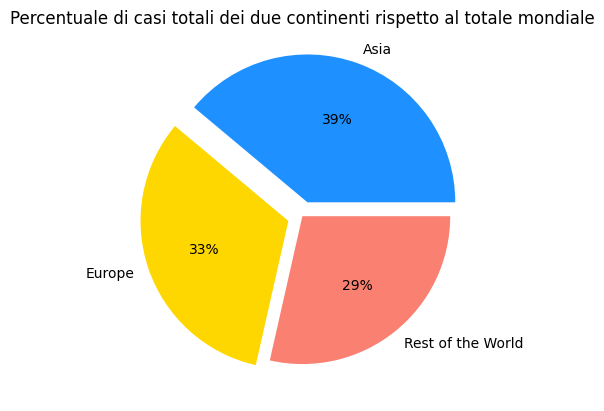

In [15]:
pie_data = [results["f_continent"]["total_correct"].round(2), results["s_continent"]["total_correct"].round(2), (100 - results["f_continent"]["total_correct"] - results["s_continent"]["total_correct"]).round(2)]
pie_labels = [first_continent, second_continent, "Rest of the World"]
pie_explodes = [0.1, 0.1, 0]
pie_colors = ["dodgerblue", "gold", "salmon"]

plt.pie(pie_data, labels=pie_labels, explode=pie_explodes, autopct="%.0f%%", colors=pie_colors)
plt.title("Percentuale di casi totali dei due continenti rispetto al totale mondiale")
plt.show;

*Step 4: Analisi di tutti i continenti*  


In [16]:
#Creo il raggruppamento come precedentemente ma per la colonna "total_vaccination" questa volta
max_vacc = df_2.groupby(by="location")["total_vaccinations"].idxmax()
df_max_vacc = df_2.loc[max_vacc]

def complete_relation(continents=continents, dataset=df_max_vacc):
    #Totale vaccini veritiero trasformato in float
    total_vacc_world = dataset.loc[(dataset["location"] == "World"), "total_vaccinations"]
    total_vacc_world = float(total_vacc_world.iloc[0])

    results = {}
    
    #Ciclo che itera ogni continente dentro la mia lista di continenti. (Inizializzata nella cella 55)
    for continent in continents:
        #Filtro il dataset con il continente
        filter_continent = dataset.loc[dataset["continent"] == continent]
        
        #Salvo i nomi degli stati con minor vaccini e maggiori
        min_name = str(filter_continent.loc[filter_continent["total_vaccinations"].idxmin(skipna=True), "location"])
        max_name = str(filter_continent.loc[filter_continent["total_vaccinations"].idxmax(), "location"])
        
        #Genero le statistiche sempre solo sulla colonna "total_vaccinations"
        continent_stats = filter_continent["total_vaccinations"].describe()
        #Calcolo anche la percentuale sul totale, questa volta solo quello veritiero. Per scelta personale
        total_perc = (filter_continent["total_vaccinations"].sum() / total_vacc_world) * 100
        
        #Riempio la dictionary da ritornare
        results.update({
            continent:{
                "min":continent_stats["min"],
                "min_name":min_name,
                "max":continent_stats["max"],
                "max_name":max_name,
                "mean":continent_stats["mean"],
                "total":total_perc
            }
        })
    return results

    

*Gestiamo ora tutti gli output*

In [17]:
results_vacc = complete_relation()
for continent in results_vacc:
    print(f"Analisi continente {continent}:")
    print(f"\tLa nazione con meno vaccinati è {results_vacc[continent]["min_name"]} con {results_vacc[continent]["min"]:,} vaccinati")
    print(f"\tLa nazione con più vaccinati è {results_vacc[continent]["max_name"]} con {results_vacc[continent]["max"]:,} vaccinati")
    print(f"\tLa media dei vaccinati è {results_vacc[continent]["mean"].round(2):,}")
    print(f"\t% sul totale mondiale: {results_vacc[continent]["total"].round(2):,}")
    print("")

Analisi continente Africa:
	La nazione con meno vaccinati è Saint Helena con 7,892.0 vaccinati
	La nazione con più vaccinati è Nigeria con 133,048,021.0 vaccinati
	La media dei vaccinati è 15,984,038.81
	% sul totale mondiale: 6.36

Analisi continente Asia:
	La nazione con meno vaccinati è Northern Cyprus con 861,519.0 vaccinati
	La nazione con più vaccinati è China con 3,491,077,000.0 vaccinati
	La media dei vaccinati è 182,038,779.3
	% sul totale mondiale: 67.07

Analisi continente Europe:
	La nazione con meno vaccinati è Monaco con 65,140.0 vaccinati
	La nazione con più vaccinati è Germany con 192,221,468.0 vaccinati
	La media dei vaccinati è 29,095,321.94
	% sul totale mondiale: 11.58

Analisi continente North America:
	La nazione con meno vaccinati è Montserrat con 4,619.0 vaccinati
	La nazione con più vaccinati è United States con 676,728,782.0 vaccinati
	La media dei vaccinati è 34,056,964.44
	% sul totale mondiale: 8.53

Analisi continente Oceania:
	La nazione con meno vaccinat